# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("/Users/aidenharris/Personal/MDST/2023-Tutorials/data/states_edu.csv")
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [3]:
min_year = df['YEAR'].min()
max_year = df['YEAR'].max()
print(type(max_year))

span = max_year-min_year

print(span, ' years')

<class 'numpy.int64'>
33  years


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [4]:


NUM_FEATURES = 4
michigan_avg = pd.DataFrame(data=df[df['STATE'] == 'MICHIGAN'], columns=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']).mean()
ohio_avg = pd.DataFrame(data=df[df['STATE'] == 'OHIO'], columns=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']).mean()

print('average outcome for Michigan: ', (michigan_avg.sum())/NUM_FEATURES)
print('average outcome for Ohio: ', (ohio_avg.sum())/NUM_FEATURES)



average outcome for Michigan:  247.9659090909091
average outcome for Ohio:  253.14659090909095


Find the average for your outcome score across all states in 2019

In [5]:
for state in df['STATE'].unique():
    year_df = df[df['YEAR'] == 2019]
    avg_outcome_all = pd.DataFrame(data=year_df[df['STATE'] == state], columns=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']).mean()
    total_avg = (avg_outcome_all.sum()) / NUM_FEATURES

    print(state, "Avegerage: ", total_avg)

ALABAMA Avegerage:  241.0
ALASKA Avegerage:  240.5
ARIZONA Avegerage:  248.25
ARKANSAS Avegerage:  245.25
CALIFORNIA Avegerage:  246.5
COLORADO Avegerage:  254.75
CONNECTICUT Avegerage:  255.75
DELAWARE Avegerage:  248.5
DISTRICT_OF_COLUMBIA Avegerage:  242.0
FLORIDA Avegerage:  253.25
GEORGIA Avegerage:  249.25
HAWAII Avegerage:  247.5
IDAHO Avegerage:  254.25
ILLINOIS Avegerage:  250.75
INDIANA Avegerage:  254.75
IOWA Avegerage:  251.5
KANSAS Avegerage:  250.75
KENTUCKY Avegerage:  250.25
LOUISIANA Avegerage:  242.5
MAINE Avegerage:  252.25
MARYLAND Avegerage:  250.75
MASSACHUSETTS Avegerage:  261.25
MICHIGAN Avegerage:  249.25
MINNESOTA Avegerage:  256.25
MISSISSIPPI Avegerage:  247.5
MISSOURI Avegerage:  250.0
MONTANA Avegerage:  253.0
NEBRASKA Avegerage:  253.75
NEVADA Avegerage:  246.5
NEW_HAMPSHIRE Avegerage:  256.0
NEW_JERSEY Avegerage:  258.75
NEW_MEXICO Avegerage:  240.0
NEW_YORK Avegerage:  249.75
NORTH_CAROLINA Avegerage:  252.25
NORTH_DAKOTA Avegerage:  253.25
OHIO Avegera

/var/folders/2q/f_5fmk7958n6gzgk7910r7s00000gn/T/ipykernel_73470/3660911638.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_outcome_all = pd.DataFrame(data=year_df[df['STATE'] == state], columns=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
/var/folders/2q/f_5fmk7958n6gzgk7910r7s00000gn/T/ipykernel_73470/3660911638.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_outcome_all = pd.DataFrame(data=year_df[df['STATE'] == state], columns=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
/var/folders/2q/f_5fmk7958n6gzgk7910r7s00000gn/T/ipykernel_73470/3660911638.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_outcome_all = pd.DataFrame(data=year_df[df['STATE'] == state], columns=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
/var/folders/2q/f_5fmk7958n6gzgk7910r7s00000gn/T/ipykernel_73470/3660911638.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_outcome_

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [6]:
print(df['TOTAL_EXPENDITURE'].dtype)
print(df['ENROLL'].dtype)
print(df['TOTAL_EXPENDITURE'].isnull().sum())
print(df['ENROLL'].isnull().sum())

float64
float64
440
491


In [32]:
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
print(df['EXPENDITURE_PER_STUDENT'].isna().sum())
print(df['ENROLL'].isna().sum())
print(df.shape)
df.head(50)

491
491
(1715, 26)


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN,NaN


In [59]:
print(len(df['EXPENDITURE_PER_STUDENT'].unique()))

1225


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT
35,1992_OHIO,OHIO,1992,NaN,9285961.0,472604.0,3631703.0,5181654.0,9483822.0,5172782.0,...,137075.0,116085.0,NaN,NaN,1795199.0,219.0,268.0,217.0,NaN,NaN
86,1993_OHIO,OHIO,1993,1834239.0,10841606.0,509488.0,4156070.0,6176048.0,10385253.0,5522474.0,...,141534.0,111932.0,NaN,NaN,1807319.0,NaN,NaN,NaN,NaN,5.661886
137,1994_OHIO,OHIO,1994,1816817.0,10735756.0,537642.0,4271944.0,5926170.0,10780138.0,5785984.0,...,142132.0,112266.0,NaN,NaN,1814290.0,NaN,NaN,NaN,NaN,5.933530
188,1995_OHIO,OHIO,1995,1829761.0,11368650.0,675770.0,4385097.0,6307783.0,11330046.0,6041768.0,...,142469.0,114879.0,NaN,NaN,1836015.0,NaN,NaN,NaN,NaN,6.192091
239,1996_OHIO,OHIO,1996,1837628.0,12172778.0,704629.0,4831397.0,6636752.0,11935582.0,6291682.0,...,140248.0,117161.0,NaN,NaN,1844698.0,NaN,NaN,NaN,NaN,6.495102


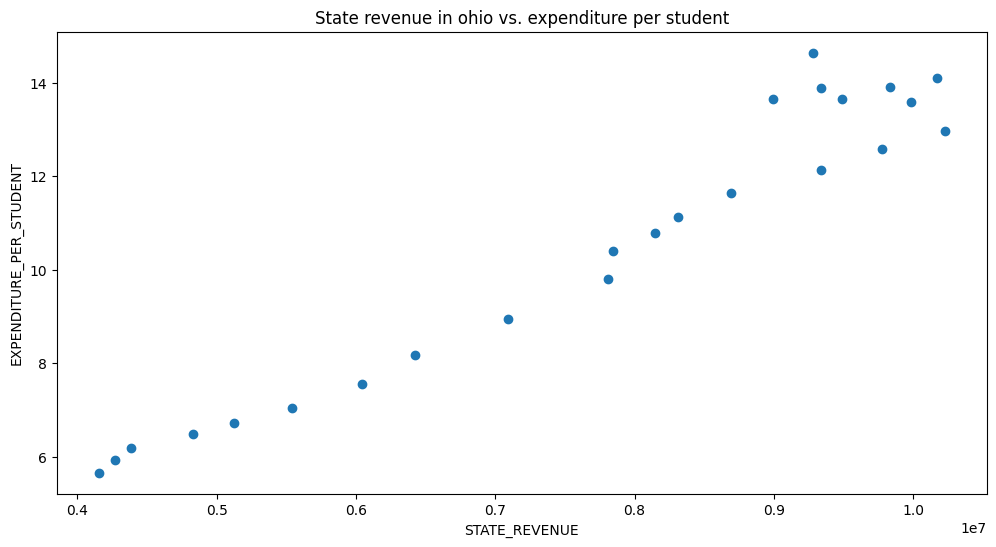

In [41]:

df_oh = df[df['STATE'] == 'OHIO']
plt.figure(figsize=(12, 6))


plt.scatter(df_oh['STATE_REVENUE'], df_oh['EXPENDITURE_PER_STUDENT'])
plt.title('State revenue in ohio vs. expenditure per student')
plt.xlabel('STATE_REVENUE')
plt.ylabel('EXPENDITURE_PER_STUDENT')

df_oh.head()

**<There Appears to be a strong Positive correlation between the state revenue in Ohio and their expenditures per student>**

**Visualization 2**

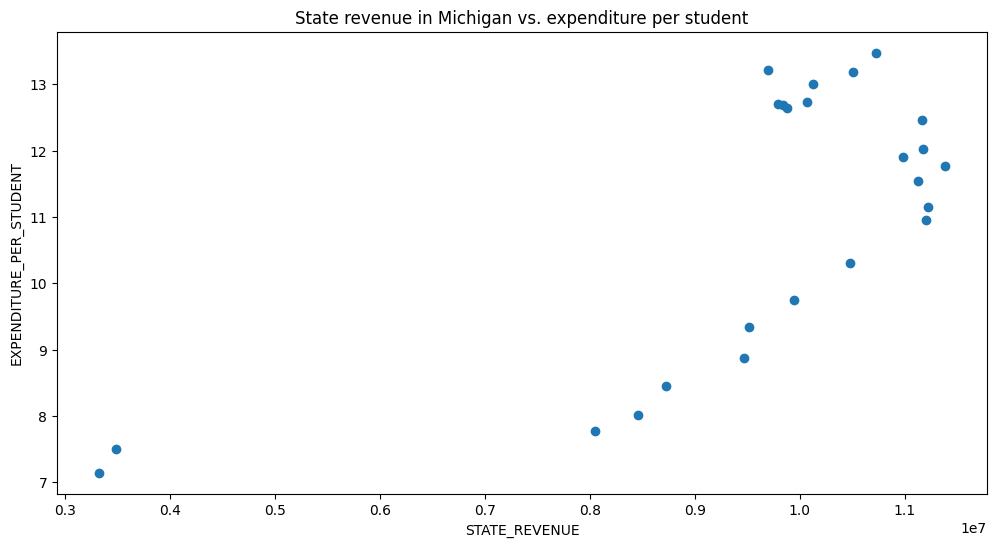

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT
22,1992_MICHIGAN,MICHIGAN,1992,NaN,9963137.0,537917.0,2539380.0,6885840.0,10170688.0,4681327.0,...,114282.0,90655.0,NaN,NaN,1603610.0,220.0,267.0,216.0,NaN,NaN
73,1993_MICHIGAN,MICHIGAN,1993,1600650.0,11034174.0,594226.0,3326748.0,7113200.0,11430958.0,5411969.0,...,116702.0,87447.0,NaN,NaN,1599377.0,NaN,NaN,NaN,NaN,7.141448
124,1994_MICHIGAN,MICHIGAN,1994,1601845.0,11762546.0,658039.0,3489815.0,7614692.0,12023935.0,5825127.0,...,117380.0,88136.0,NaN,NaN,1614784.0,NaN,NaN,NaN,NaN,7.506304
175,1995_MICHIGAN,MICHIGAN,1995,1604527.0,12500208.0,692600.0,8053624.0,3753984.0,12477806.0,6162390.0,...,118996.0,87840.0,NaN,NaN,1641456.0,NaN,NaN,NaN,NaN,7.776626
226,1996_MICHIGAN,MICHIGAN,1996,1631131.0,13012080.0,648922.0,8462687.0,3900471.0,13071893.0,6452165.0,...,122686.0,95028.0,NaN,NaN,1685714.0,NaN,NaN,NaN,NaN,8.014006


In [42]:

df_mi = df[df['STATE'] == 'MICHIGAN']
plt.figure(figsize=(12, 6))


plt.scatter(df_mi['STATE_REVENUE'], df_mi['EXPENDITURE_PER_STUDENT'])
plt.title('State revenue in Michigan vs. expenditure per student')
plt.xlabel('STATE_REVENUE')
plt.ylabel('EXPENDITURE_PER_STUDENT')

plt.show()


**<There Appears to be a strong Positive correlation between the state revenue in Michigan and their expenditures per student>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [66]:
from sklearn.model_selection import train_test_split


In [67]:
X = df_oh[['STATE_REVENUE']].dropna()
y = df_oh.loc[X.index]['EXPENDITURE_PER_STUDENT']
y.fillna(y.median(), inplace=True)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [74]:
import statsmodels.api as sm

In [83]:
X = sm.add_constant(X)
model = sm.OLS(y_train, X_train)


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [84]:
res = model.fit()
print(res.summary())


                                   OLS Regression Results                                   
Dep. Variable:     EXPENDITURE_PER_STUDENT   R-squared (uncentered):                   0.995
Model:                                 OLS   Adj. R-squared (uncentered):              0.995
Method:                      Least Squares   F-statistic:                              3358.
Date:                     Thu, 14 Sep 2023   Prob (F-statistic):                    5.63e-21
Time:                             12:37:12   Log-Likelihood:                         -20.845
No. Observations:                       18   AIC:                                      43.69
Df Residuals:                           17   BIC:                                      44.58
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

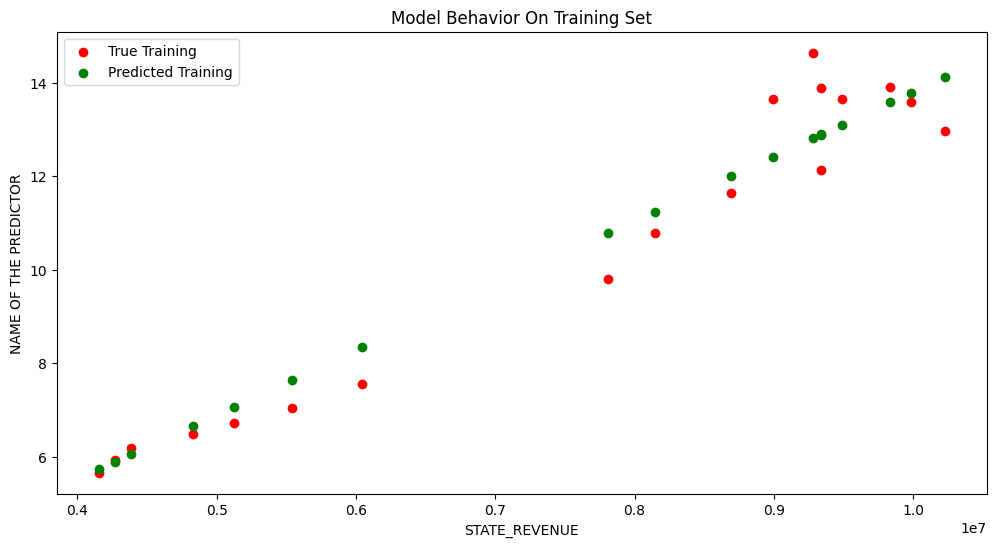

In [85]:
y_predicted = res.predict(X_train)
col_name = 'STATE_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], y_predicted, color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

I chose to use an OLS model for the predictions. The model shows very strong predictive performance with an R^2 value of .995. The coefficient on the independent variable "STATE_REVENUE", is statistically significant with a p-value of .000, which indicates a strong relationship between the predictor and target variable. Furthermore, the coefficient is positive which shows a strong positive relationships between the variables.